# 3.15.x Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.xlsx` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import requests

In [2]:
# utilizzo pandas per leggere il file excel
sps = pd.read_excel("data/Software Professionals Salary.xlsx")

In [3]:
sps

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


1. What is the shape (rows, cols) of the `sps` DataFrame? 

In [4]:
# shape mostra il numero di righe e di colonne
sps.shape

(22770, 8)

2. How many unique `Job Roles` are there in the dataset? 

In [5]:
#con unique visualizzo i valori unici con nunique il numero degli stessi
uniqueValues = sps['Job Roles'].unique()
n_uniqueValues = sps['Job Roles'].nunique()
print(uniqueValues,"Ci sono",n_uniqueValues,"unique Job Roles")

['Android' 'Backend' 'Database' 'Frontend' 'IOS' 'Java' 'Mobile' 'SDE'
 'Python' 'Web' 'Testing'] Ci sono 11 unique Job Roles


3. How many unique `Job Title` are there for the "Python" `Job Role`? 

In [6]:
#prendo le colonne che mi interessano e le assegno ad una nuova variabile
job_t= sps[['Job Title','Job Roles']]
#utilizzo loc per identificare le righe dove c'è scritto Python
job_t = job_t.loc[job_t['Job Roles'] == 'Python']
#creo una nuova varibile dove grazie a nunique conto il numero esatto di valori unici all'interno della colonna
j_uniqueValues = job_t['Job Title'].nunique()
print("Ci sono",j_uniqueValues,"unique Job Title per Python Job Role")


Ci sono 102 unique Job Title per Python Job Role


4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [7]:
#creo una nuova variabile con le colonne che mi interessano
df_cn = sps[['Company Name','Job Title','Job Roles']]
#seleziono tutte le righe dove c'è scritto Python
df_cn = df_cn[df_cn['Job Roles'] == 'Python']
#seleziono tutte le righe dove al loro interno è contenuta la parola Analyst
df_cn = df_cn[df_cn['Job Title'].str.contains('Analyst')]
#dopo aver filtrato conto le company names che hanno come valori unici Python e la substring Analyst
df_cn = df_cn['Company Name'].nunique()
df_cn

3

5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [8]:
#seleziono le colonne che mi interessano e le assegno ad una nuova variabile
h_salaries = sps[['Company Name','Salaries Reported']]
#con groupby classifico per nome della compagnia e sommo tutti i salari per ogni compagnia
h_salaries = h_salaries.groupby('Company Name')['Salaries Reported'].sum().reset_index(drop=False)
#metto i valori in ordine discendente
h_salaries = h_salaries.sort_values(by='Salaries Reported',ascending=False)
h_salaries.head(10)

,Company Name,Salaries Reported
660,Amazon,2636
4486,Infosys,2032
9161,Tata Consultancy Services,1286
313,Accenture,894
10401,Wipro,651
5832,Microsoft,633
2094,Cognizant Technology Solutions,591
3362,Flipkart,585
4180,IBM,457
5875,Mindtree,431


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [9]:
#seleziono le colonne che mi interessano e le assegno ad una nuova variabile
location = sps[['Company Name','Location']]
#seleziono le righe dove c'è solo Amazon presente(visto che è la compagnia con il più alto numero di salari riportati) 
location = location.loc[location['Company Name'] == 'Amazon']
#tolgo i valori doppi nelle righe di location
location = location.drop_duplicates()
#conto il numweo si location uniche dove è presente Amazon
n_location = location.nunique()
location,n_location

(      Company Name        Location
 153         Amazon       Bangalore
 1455        Amazon       Hyderabad
 1973        Amazon       New Delhi
 9084        Amazon         Chennai
 15802       Amazon          Jaipur
 15973       Amazon         Kolkata
 16201       Amazon  Madhya Pradesh
 16303       Amazon          Mumbai
 19042       Amazon            Pune,
 Company Name    1
 Location        9
 dtype: int64)

7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [10]:
# prendo il link che mi serve
url = 'https://open.er-api.com/v6/latest/USD'

# lancio una richiesta
usd = requests.get(url)

In [11]:
#controllo lo status della richiesta, 200 conferma che è tutto ok
usd.status_code


200

In [12]:
#trasformo l'api in json e assegnoa ad una nuova variabile
j_usd = usd.json()

In [13]:
#creo un dataframe dal dizionario del json e assegno ad una nuova variabile
df = pd.DataFrame.from_dict(j_usd)

In [14]:
#trasformo la colonna rates in una colonna con valore numerico
df['rates'] = pd.to_numeric(df['rates'])

In [15]:
#controllo il dataframe
df

,result,provider,documentation,terms_of_use,time_last_update_unix,time_last_update_utc,time_next_update_unix,time_next_update_utc,time_eol_unix,base_code,rates
AED,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1672272152,"Thu, 29 Dec 2022 00:02:32 +0000",1672360142,"Fri, 30 Dec 2022 00:29:02 +0000",0,USD,3.672500
AFN,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1672272152,"Thu, 29 Dec 2022 00:02:32 +0000",1672360142,"Fri, 30 Dec 2022 00:29:02 +0000",0,USD,88.501478
ALL,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1672272152,"Thu, 29 Dec 2022 00:02:32 +0000",1672360142,"Fri, 30 Dec 2022 00:29:02 +0000",0,USD,106.334489
AMD,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1672272152,"Thu, 29 Dec 2022 00:02:32 +0000",1672360142,"Fri, 30 Dec 2022 00:29:02 +0000",0,USD,393.482617
ANG,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1672272152,"Thu, 29 Dec 2022 00:02:32 +0000",1672360142,"Fri, 30 Dec 2022 00:29:02 +0000",0,USD,1.790000
...,...,...,...,...,...,...,...,...,...,...,...
XPF,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1672272152,"Thu, 29 Dec 2022 00:02:32 +0000",1672360142,"Fri, 30 Dec 2022 00:29:02 +0000",0,USD,112.269739
YER,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1672272152,"Thu, 29 Dec 2022 00:02:32 +0000",1672360142,"Fri, 30 Dec 2022 00:29:02 +0000",0,USD,250.193746
ZAR,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1672272152,"Thu, 29 Dec 2022 00:02:32 +0000",1672360142,"Fri, 30 Dec 2022 00:29:02 +0000",0,USD,17.130543
ZMW,success,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,1672272152,"Thu, 29 Dec 2022 00:02:32 +0000",1672360142,"Fri, 30 Dec 2022 00:29:02 +0000",0,USD,17.974994


In [16]:
#e il tipo di recordo all'inerno di ogni colonna
df.dtypes

result                    object
provider                  object
documentation             object
terms_of_use              object
time_last_update_unix      int64
time_last_update_utc      object
time_next_update_unix      int64
time_next_update_utc      object
time_eol_unix              int64
base_code                 object
rates                    float64
dtype: object

In [17]:
#seleziono solo i dati relativi al tasso di conversione con le Rupie indiane
df = df.loc['INR']
df

result                                                      success
provider                           https://www.exchangerate-api.com
documentation            https://www.exchangerate-api.com/docs/free
terms_of_use                 https://www.exchangerate-api.com/terms
time_last_update_unix                                    1672272152
time_last_update_utc                Thu, 29 Dec 2022 00:02:32 +0000
time_next_update_unix                                    1672360142
time_next_update_utc                Fri, 30 Dec 2022 00:29:02 +0000
time_eol_unix                                                     0
base_code                                                       USD
rates                                                     82.829511
Name: INR, dtype: object

In [18]:
#divido la colonna dei salari in rupie per il tasso di cambio in dollari e creo una nuova colonna arrotondando a numeri interi
#new_col = sps['Salary'].multiply(df['rates'],axis='index')
new_col = sps['Salary']/ df['rates']
new_col = new_col.astype('int')
new_col

0         4829
1         4829
2        12072
3         3621
4         7243
         ...  
22765     2414
22766     3621
22767     2318
22768     3621
22769     3621
Name: Salary, Length: 22770, dtype: int32

In [19]:
#seleziono le colonne che mi servono e assegno ad una nuova variabile
sps_new = sps [['Rating','Company Name','Job Title','Salary','Job Roles']]
sps_new

,Rating,Company Name,Job Title,Salary,Job Roles
0,3.8,Sasken,Android Developer,400000,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,Android
2,4.0,Unacademy,Android Developer,1000000,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,Android
...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,Web


In [20]:
#creo due nuove colonne da aggiungere al data frame contenenti il tasso di cambio e gli stipendi calcolati in dollari
sps_new['rates'] = df['rates']
sps_new ['Salary USD'] = new_col
sps_new = sps_new [['Rating','Company Name','Salary','Salary USD','rates','Job Title','Job Roles']]
#sps_new = sps_new.join(df)
#sps_new = sps_new.insert(3,'Salary USD',new_col)
sps_new

C:\Users\dricc\AppData\Local\Temp\ipykernel_7524\835194959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sps_new['rates'] = df['rates']
C:\Users\dricc\AppData\Local\Temp\ipykernel_7524\835194959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sps_new ['Salary USD'] = new_col


,Rating,Company Name,Salary,Salary USD,rates,Job Title,Job Roles
0,3.8,Sasken,400000,4829,82.829511,Android Developer,Android
1,4.5,Advanced Millennium Technologies,400000,4829,82.829511,Android Developer,Android
2,4.0,Unacademy,1000000,12072,82.829511,Android Developer,Android
3,3.8,SnapBizz Cloudtech,300000,3621,82.829511,Android Developer,Android
4,4.4,Appoids Tech Solutions,600000,7243,82.829511,Android Developer,Android
...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,200000,2414,82.829511,Web Developer,Web
22766,4.0,Nextgen Innovation Labs,300000,3621,82.829511,Web Developer,Web
22767,4.1,Fresher,192000,2318,82.829511,Full Stack Web Developer,Web
22768,4.1,Accenture,300000,3621,82.829511,Full Stack Web Developer,Web


8. What is the average `Salary USD` for the "Python" `Job Role`? 

In [21]:
#seleziono solo i ruoli che contengono Python
sps_new_py = sps_new.loc[sps_new['Job Roles'] == 'Python']
#calcolo il salario medio in dollari per questo ruolo
sps_new_py['avg salary'] = sps_new_py['Salary USD'].mean()
#prendo il primo valore della nuova colonna per avere il risultato
sps_new_py_avg = sps_new_py['avg salary'].astype(int).head(1)

C:\Users\dricc\AppData\Local\Temp\ipykernel_7524\4036042289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sps_new_py['avg salary'] = sps_new_py['Salary USD'].mean()


In [22]:
#stampo il risultato del salario medio in dollari
sps_new_py_avg.reset_index(False).drop(columns='index')

,avg salary
0,5867


9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s? 

In [23]:
#prendo le colonne che mi servono e le assegno ad una nuova variabile
sps_new_s = sps_new[['Rating','Company Name','Salary USD']]
#raggruppo per compagnia e faccio la media del rating e del salario in dollari
sps_new_s.groupby('Company Name').mean()[['Rating','Salary USD']].reset_index(drop=False)
#li classifico per salario in maniera discendente
sps_new_s = sps_new_s.sort_values(by='Salary USD',ascending=False)
#rinomino le colonne per rendere il data frame più leggibile
sps_new_s.rename(columns={'Salary USD': 'Average Salary USD', 'Rating':'Average Rating'}, inplace=True)
sps_new_s.head(10)

,Average Rating,Company Name,Average Salary USD
18635,3.6,Thapar University,1086569
9260,3.6,OASYS Cybernetics,120729
4471,3.8,Concentrix,120729
7121,3.5,Koru UX Design,120729
5819,3.7,Nityo Infotech,119522
16062,3.8,Amazon,118918
18654,4.3,Digital Raju,118315
16619,4.2,FFF Enterprises,118315
15568,5.0,Gaana Lyrics Point.com,117108
10832,4.6,GGH Heavy Industries,115900


10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

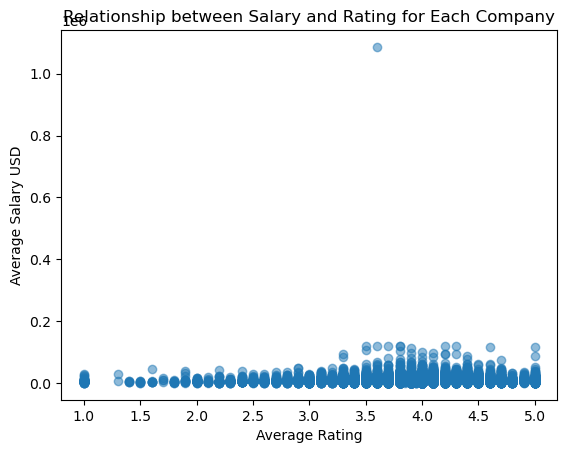

In [24]:
#prendo i valori delle colonne che mi iteressano per il grafico
x = sps_new_s['Average Rating']
y = sps_new_s['Average Salary USD']

#creo il grafico
plt.scatter(x,y, alpha=0.5)
#aggiungo titolo e label
plt.xlabel('Average Rating')
plt.ylabel('Average Salary USD')
plt.title('Relationship between Salary and Rating for Each Company')
#mostro il grafico
plt.show()
#l'anomalia fa rifermento alla Thapar University che, a prescindere dal rating, ha un salario medio nettamente più altro rispetto alle altre company e si vede dal punto più in alto